In [3]:
import os, numpy as np
import csv
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,8]

In [10]:
def dissolve(A, max, window=np.array([[1/8.,1/8.,1/8.], [1/8.,0,1/8.], [1/8.,1/8.,1/8.]]), verbose=False):

    """Distributes population within a 2d-array A from cells above max to neighboring 
    cells based on a window array, which should be a square window with weights summing 
    up to 1.0, and 0 in the middle (the source cell), e.g.
    
    [[1/8., 1/8., 1/8.],
     [1/8., 0,    1/8.],
     [1/8., 1/8., 1/8.]]
     
     This is also the standard window being used if no window is provided.
     
     The verbose parameter can be used to have the function print the number of iterations 
     until all cells are below max.
     
     The process is repeated iteratively until no cells are above max any longer. 
     My experiments have shown that larger and more complex windows actually slow things down, 
     even though they mean fewer iterations of the function. So it might be best to stick with 
     the standard window.
     
     ⚡️ A needs to be a 2d array!
     ⚡️ Note that the function doesn't care whether a cell is in a given country, in the water,
     etc. So this may push people into the water or neighboring countries!
     ⚡️ Also note that because of border effects, the sum of the output array will almost always be
     (slightly) smaller than in the sum of the input array (unless the border cells in the input are all 0)
    """
    
    its = 0
    while((A.max() > max)):
        its = its + 1
        
        if(verbose):
            print("Iteration " + str(its) + "; Current max: " + str(A.max()))
        
        # keeps the numbers that are at or below the limit: (A<=max)*A
        # sets the numbers that are higher than max to max: (A>max)*max

        # this array contains all the values from the original one, but with those > max set to max:
        reduced = (( A <= max ) * A) + (( A > max ) * max)

        # the next one contains all the values beyond the max, and 0 everywhere else
        over    = ( A > max ) * ( A - reduced)

        # next, we'll use a sliding window on the "over" array to redistribute the people
        # and add them back to the "reduced" array
        A = reduced + signal.convolve2d( over, window, 'same' )
        
    
    if(verbose):
        print(str(its)+" iterations")
        
    return A


1.0
1.0


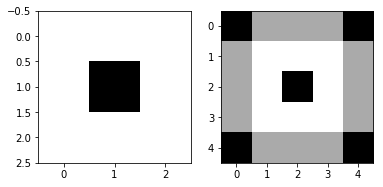

In [8]:
# generate windows for testing:

window1 = np.array([[1/8.,1/8.,1/8.],
                    [1/8.,0,1/8.],
                    [1/8.,1/8.,1/8.]])

# fancy non-square window
window2 = np.array([[0,     1/24., 1/24., 1/24., 0    ],
                    [1/24., 1/16., 1/16., 1/16., 1/24.],
                    [1/24., 1/16., 0,     1/16., 1/24.],
                    [1/24., 1/16., 1/16., 1/16., 1/24.],
                    [0,     1/24., 1/24., 1/24., 0    ]])


print(window1.sum())
print(window2.sum())
    
plt.subplot(1, 2, 1)
plt.imshow(window1, cmap=cm.gray,)
plt.subplot(1, 2, 2)
plt.imshow(window2, cmap=cm.gray,)
plt.show()

Max: 1 , window size: (3, 3)
Dissolve: Can't seem to reduce the max value any further.
Stopping at a max of 5 (was going for 5)
36 --> 33.74999999999999


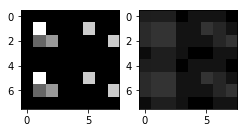

Max: 2 , window size: (3, 3)
Dissolve: Can't seem to reduce the max value any further.
Stopping at a max of 5 (was going for 5)
36 --> 34.50000000000001


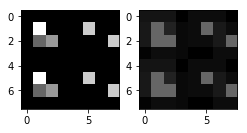

Max: 3 , window size: (3, 3)
Dissolve: Can't seem to reduce the max value any further.
Stopping at a max of 5 (was going for 5)
36 --> 35.25


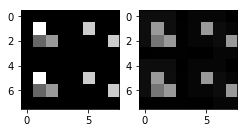

Max: 4 , window size: (3, 3)
Dissolve: Can't seem to reduce the max value any further.
Stopping at a max of 5 (was going for 5)
36 --> 36.0


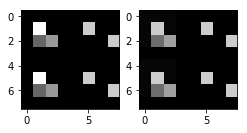

Max: 1 , window size: (5, 5)
Dissolve: Can't seem to reduce the max value any further.
Stopping at a max of 5 (was going for 5)
36 --> 30.45780051150895


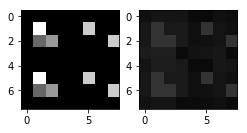

Max: 2 , window size: (5, 5)
Dissolve: Can't seem to reduce the max value any further.
Stopping at a max of 5 (was going for 5)
36 --> 32.50127877237851


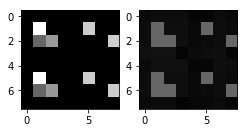

Max: 3 , window size: (5, 5)
Dissolve: Can't seem to reduce the max value any further.
Stopping at a max of 5 (was going for 5)
36 --> 34.18789428815004


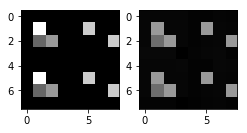

Max: 4 , window size: (5, 5)
Dissolve: Can't seem to reduce the max value any further.
Stopping at a max of 5 (was going for 5)
36 --> 35.625


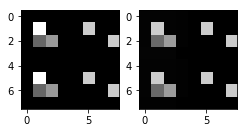

In [6]:
# test with a small array:

A = np.array([[0,0,0,0,0,0,0,0],
              [0,5,0,0,0,4,0,0],
              [0,2,3,0,0,0,0,4],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,5,0,0,0,4,0,0],
              [0,2,3,0,0,0,0,4],
              [0,0,0,0,0,0,0,0]])


for w in [window1,window2]:
    for max in range(1,5):    
        print("Max: "+str(max)+" , window size: "+str(w.shape))
        B = dissolve(A, max, w)
        print(str(A.sum())+" --> "+str(B.sum()))
        
        plt.subplot(1, 3, 1)
        plt.imshow(A, cmap=cm.gray, vmin=0, vmax=A.max())
        plt.subplot(1, 3, 2)
        plt.imshow(B, cmap=cm.gray, vmin=0, vmax=A.max())
        plt.show()

Let's test whether the check for an "impossible" dissolve works, where there are simply too many people in the area under consideration:

Max: 20 , window size: (5, 5)
Iteration 1
Current max: 60
Iteration 2
Current max: 28.75
Iteration 3
Current max: 21.71875
Iteration 4
Current max: 20.5078125
Iteration 5
Current max: 20.10498046875
Iteration 6
Current max: 20.03326416015625
Iteration 7
Current max: 20.007400512695312
Iteration 8
Current max: 20.002307891845703
Iteration 9
Current max: 20.0005704164505
Iteration 10
Current max: 20.000165030360222
Iteration 11
Current max: 20.000042859464884
Iteration 12
Current max: 20.000011979136616
Iteration 13
Current max: 20.00000318410457
Iteration 14
Current max: 20.000000875825208
Iteration 15
Current max: 20.0000002353363
Iteration 16
Current max: 20.00000006425239
Iteration 17
Current max: 20.000000017352342
Iteration 18
Current max: 20.000000004721233
Iteration 19
Current max: 20.000000001278053
Iteration 20
Current max: 20.000000000347175
Iteration 21
Current max: 20.000000000094083
Iteration 22
Current max: 20.000000000025537
Iteration 23
Current max: 20.000000000006924
It

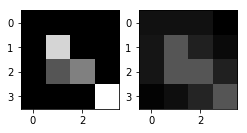

Max: 15 , window size: (5, 5)
Iteration 1
Current max: 60
Iteration 2
Current max: 25.625
Iteration 3
Current max: 17.109375
Iteration 4
Current max: 15.634765625
Iteration 5
Current max: 15.133056640625
Iteration 6
Current max: 15.042266845703125
Iteration 7
Current max: 15.009708404541016
Iteration 8
Current max: 15.00295877456665
Iteration 9
Current max: 15.000742375850677
Iteration 10
Current max: 15.000212527811527
Iteration 11
Current max: 15.000055585987866
Iteration 12
Current max: 15.000015460536815
Iteration 13
Current max: 15.000004123066901
Iteration 14
Current max: 15.000001131529643
Iteration 15
Current max: 15.000000304513605
Iteration 16
Current max: 15.000000083051788
Iteration 17
Current max: 15.00000002244553
Iteration 18
Current max: 15.00000000610399
Iteration 19
Current max: 15.000000001652923
Iteration 20
Current max: 15.000000000448901
Iteration 21
Current max: 15.000000000121672
Iteration 22
Current max: 15.000000000033022
Iteration 23
Current max: 15.000000000

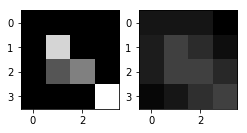

Max: 11 , window size: (5, 5)
Iteration 1
Current max: 60
Iteration 2
Current max: 23.125
Iteration 3
Current max: 13.421875
Iteration 4
Current max: 11.93359375
Iteration 5
Current max: 11.368408203125
Iteration 6
Current max: 11.200408935546875
Iteration 7
Current max: 11.101951599121094
Iteration 8
Current max: 11.053417205810547
Iteration 9
Current max: 11.027663946151733
Iteration 10
Current max: 11.014389634132385
Iteration 11
Current max: 11.007472723722458
Iteration 12
Current max: 11.003883009776473
Iteration 13
Current max: 11.002017261926085
Iteration 14
Current max: 11.001048072357662
Iteration 15
Current max: 11.000544511844055
Iteration 16
Current max: 11.000282896864519
Iteration 17
Current max: 11.00014697626193
Iteration 18
Current max: 11.00007636017233
Iteration 19
Current max: 11.000039672207578
Iteration 20
Current max: 11.000020611325482
Iteration 21
Current max: 11.000010708421165
Iteration 22
Current max: 11.000005563460098
Iteration 23
Current max: 11.000002890

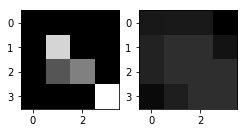

Max: 10 , window size: (5, 5)
Iteration 1
Current max: 60
Iteration 2
Current max: 22.5
Iteration 3
Current max: 12.8125
Iteration 4
Current max: 11.40625
Iteration 5
Current max: 10.625
Iteration 6
Current max: 10.345458984375
Iteration 7
Current max: 10.17547607421875
Iteration 8
Current max: 10.091934204101562
Iteration 9
Current max: 10.047616958618164
Iteration 10
Current max: 10.02476692199707
Iteration 11
Current max: 10.012862086296082
Iteration 12
Current max: 10.006683394312859
Iteration 13
Current max: 10.003472100943327
Iteration 14
Current max: 10.001803934574127
Iteration 15
Current max: 10.000937210279517
Iteration 16
Current max: 10.000486920180265
Iteration 17
Current max: 10.000252974568866
Iteration 18
Current max: 10.000131430620058
Iteration 19
Current max: 10.000068283540031
Iteration 20
Current max: 10.000035476076334
Iteration 21
Current max: 10.000018431263307
Iteration 22
Current max: 10.000009575790525
Iteration 23
Current max: 10.000004975012391
Iteration 24

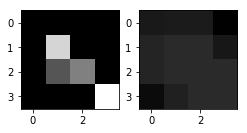

Max: 9 , window size: (5, 5)
Iteration 1
Current max: 60
Iteration 2
Current max: 21.875
Iteration 3
Current max: 12.078125
Iteration 4
Current max: 10.84765625
Iteration 5
Current max: 9.810546875
Iteration 6
Current max: 9.4490966796875
Iteration 7
Current max: 9.22802734375
Iteration 8
Current max: 9.119726181030273
Iteration 9
Current max: 9.066635727882385
Iteration 10
Current max: 9.036694809794426
Iteration 11
Current max: 9.020542511716485
Iteration 12
Current max: 9.011474398197606
Iteration 13
Current max: 9.006436706258683
Iteration 14
Current max: 9.003609344730648
Iteration 15
Current max: 9.00202619372294
Iteration 16
Current max: 9.001137387504798
Iteration 17
Current max: 9.000638654800078
Iteration 18
Current max: 9.000358609562547
Iteration 19
Current max: 9.00020137832559
Iteration 20
Current max: 9.00011308479271
Iteration 21
Current max: 9.000063504611536
Iteration 22
Current max: 9.000035662090221
Iteration 23
Current max: 9.000020026771736
Iteration 24
Current ma

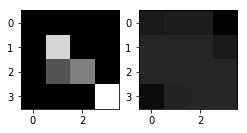

Max: 5 , window size: (5, 5)
Iteration 1
Current max: 60
Iteration 2
Current max: 19.375
Iteration 3
Current max: 9.609375
Iteration 4
Current max: 8.7109375
Iteration 5
Current max: 7.283935546875
Iteration 6
Current max: 6.64520263671875
Iteration 7
Current max: 6.136989593505859
Iteration 8
Current max: 5.820789337158203
Iteration 9
Current max: 5.59205174446106
Iteration 10
Current max: 5.426191911101341
Iteration 11
Current max: 5.306648826226592
Iteration 12
Current max: 5.220534517429769
Iteration 13
Current max: 5.158580955030629
Iteration 14
Current max: 5.114019259654015
Iteration 15
Current max: 5.081976338333334
Iteration 16
Current max: 5.058936908666567
Iteration 17
Current max: 5.042372262880939
Iteration 18
Current max: 5.03046303258599
Iteration 19
Current max: 5.0219009734419915
Iteration 20
Current max: 5.0157453745879765
Iteration 21
Current max: 5.011319891510115
Iteration 22
Current max: 5.008138256154169
Iteration 23
Current max: 5.005850868878341
Iteration 24
Cu

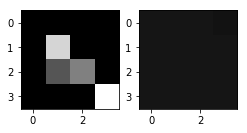

Max: 1 , window size: (5, 5)
Iteration 1
Current max: 60
Iteration 2
Current max: 16.875
Iteration 3
Current max: 9.390625
Iteration 4
Current max: 7.3359375
Iteration 5
Current max: 5.218017578125
Iteration 6
Current max: 4.100830078125
Iteration 7
Current max: 3.218730926513672
Iteration 8
Current max: 2.624645233154297
Iteration 9
Current max: 2.182355761528015
Iteration 10
Current max: 1.8652707636356354
Iteration 11
Current max: 1.6322812708094716
Iteration 12
Current max: 1.4626804101280868
Iteration 13
Current max: 1.3384544826549245
Iteration 14
Current max: 1.2476597418499296
Iteration 15
Current max: 1.181211941041056
Iteration 16
Current max: 1.1326017454470048
Iteration 17
Current max: 1.0970306848303828
Iteration 18
Current max: 1.0710029418671816
Iteration 19
Current max: 1.0519569605215826
Iteration 20
Current max: 1.038020075263495
Iteration 21
Current max: 1.0278216215459695
Iteration 22
Current max: 1.0203588097805922
Iteration 23
Current max: 1.014897810247404
Iterat

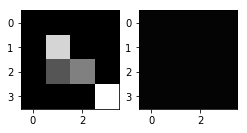

In [12]:
# array with 16 cells and a sum of 160, i.e. it's impossile to get the max below 10:
A = np.array([[0,0,0,0],
              [0,50,0,0],
              [0,20,30,0],
              [0,0,0,60]])

for max in [20,15,11,10,9,5,1]:    
        print("Max: "+str(max)+" , window size: "+str(w.shape))
        B = dissolve(A, max, verbose=True)
        print(str(A.sum())+" --> "+str(B.sum()))
        
        plt.subplot(1, 3, 1)
        plt.imshow(A, cmap=cm.gray, vmin=0, vmax=A.max())
        plt.subplot(1, 3, 2)
        plt.imshow(B, cmap=cm.gray, vmin=0, vmax=A.max())
        plt.show()

Max: 800 , window size: (3, 3)
499769627 --> 499735653.2423443


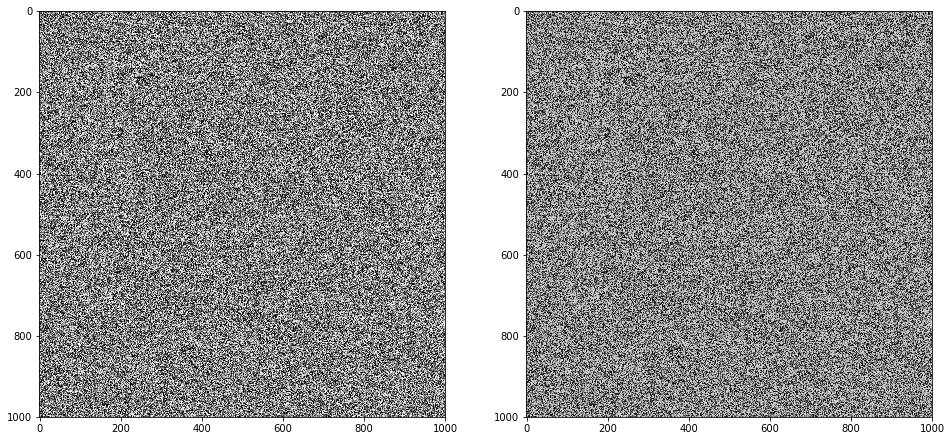

Max: 900 , window size: (3, 3)
499769627 --> 499761967.1249287


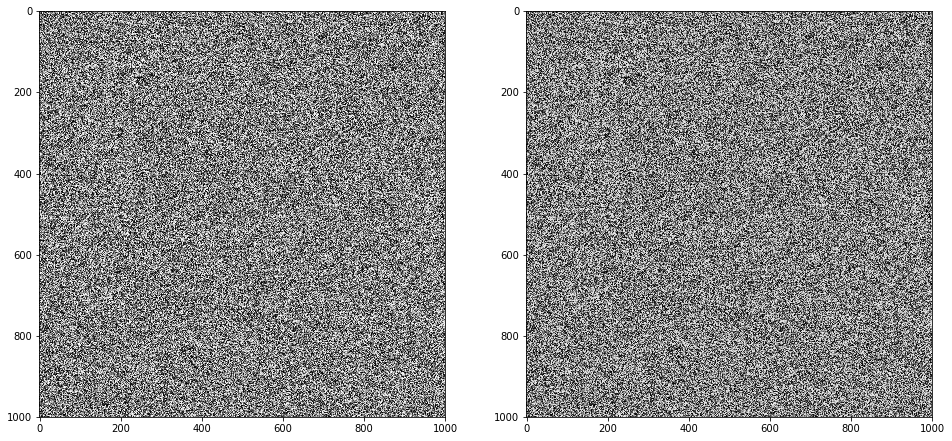

Max: 800 , window size: (5, 5)
499769627 --> 499721665.0777998


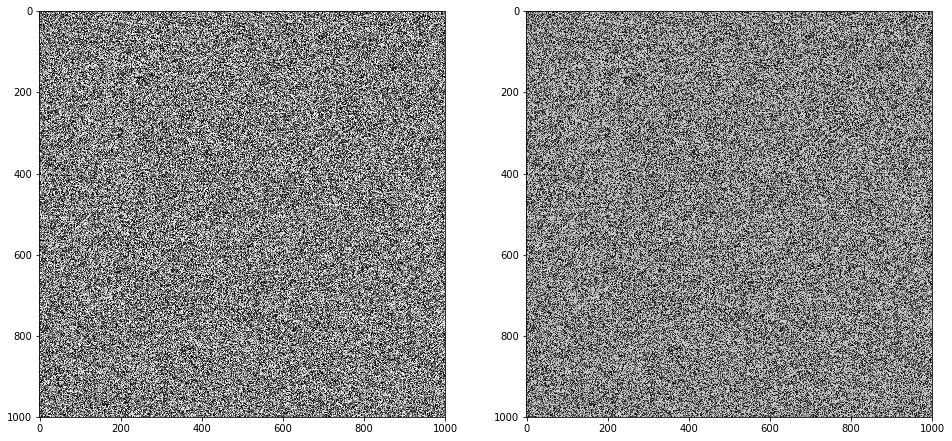

Max: 900 , window size: (5, 5)
499769627 --> 499758704.1027044


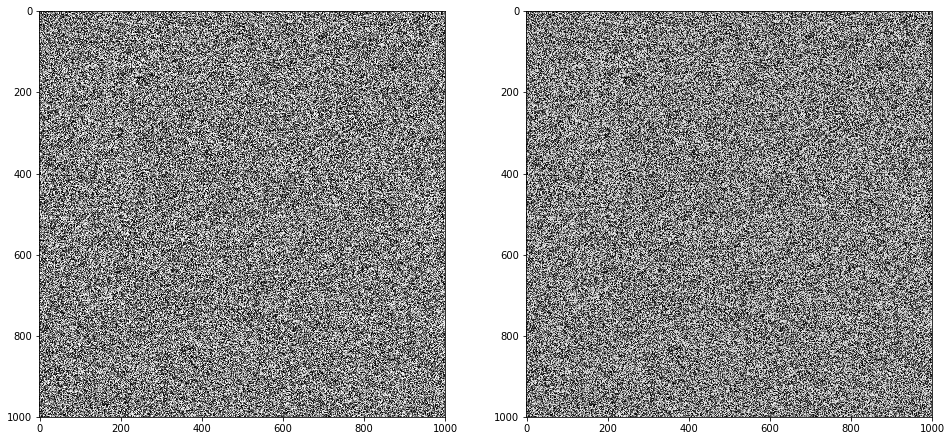

In [49]:
# test with a large array:
A = np.random.randint(1000, size=1000000).reshape(1000,1000)

for w in [window1,window2]:
    for i in [800,900]:    
        print("Max: "+str(i)+" , window size: "+str(w.shape))
        #%timeit B = dissolve(A, i, w)
        B = dissolve(A, i, w)
        print(str(A.sum())+" --> "+str(B.sum()))
        
        plt.subplot(1, 2, 1)
        plt.imshow(A, cmap=cm.gray, vmin=0, vmax=A.max())
        plt.subplot(1, 2, 2)
        plt.imshow(B, cmap=cm.gray, vmin=0, vmax=A.max())
        plt.show()

Interesting observation: **Bigger windows make the overall process slower** – even though they result in fewer iterations until no cell is above max. I'll put in  a standard window of 3x3 then...

Let's try to tune this a bit further: This version checks only once which values are below the threshold. Let's see if that's faster:

In [58]:
def diss(A, max, window=np.array([[1/8.,1/8.,1/8.], [1/8.,0,1/8.], [1/8.,1/8.,1/8.]]), verbose=False):

    its = 0
    while(A.max() > max):
        its = its + 1

        over = A > max  # !!!
        reduced = (( np.invert(over) ) * A) + (( over ) * max)   # !!!

        # the next one contains all the values beyond the max, and 0 everywhere else
        numOver    = ( A > max ) * ( A - reduced)  # !!!

        # next, we'll use a sliding window on the "over" array to redistribute the people
        # and add them back to the "reduced" array
        A = reduced + signal.convolve2d( numOver, window, 'same' )

    if(verbose):
        print(str(its)+" iterations")
        
    return A





# test with a large array:
A = np.random.randint(1000, size=1000000).reshape(1000,1000)

# check if they both produce the same result
for w in [window1,window2]:
    for i in [800,900]:    
        print("Max: "+str(i)+" , window size: "+str(w.shape))
        B = dissolve(A, i, w)
        C = diss(A, i, w)
        print(str(A.sum())+" --> "+str(B.sum()))
        print(str(A.sum())+" --> "+str(C.sum()))
        print(np.array_equal(B,C))
        print(" ")
        print(" ---- ")
        print(" ")

Max: 800 , window size: (3, 3)
499977722 --> 499942361.8274664
499977722 --> 499942361.8274664
True
 
 ---- 
 
Max: 900 , window size: (3, 3)
499977722 --> 499969846.594245
499977722 --> 499969846.594245
True
 
 ---- 
 
Max: 800 , window size: (5, 5)
499977722 --> 499928681.4380002
499977722 --> 499928681.4380002
True
 
 ---- 
 
Max: 900 , window size: (5, 5)
499977722 --> 499966660.79091054
499977722 --> 499966660.79091054
True
 
 ---- 
 


In [60]:
%timeit dissolve(A, 800, window1)
%timeit diss(A, 800, window1)

6.4 s ± 48.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.07 s ± 559 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
%timeit dissolve(A, 900)
%timeit diss(A, 900)

3.65 s ± 353 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.4 s ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Seems to be in the same ball park. Let's keep the code the way it is, it's easier to read.